In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [13]:
xx = np.linspace(-1, 1, 250)

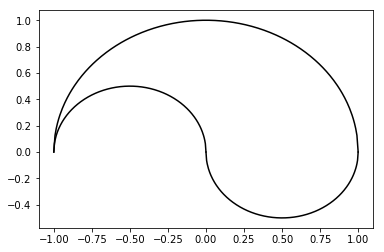

In [20]:
plt.plot(xx, np.sqrt(1 - xx ** 2), c='k')
plt.plot(xx / 2 - 0.5, np.sqrt(1 - xx ** 2) / 2, c='k')
plt.plot(xx / 2 + 0.5, -np.sqrt(1 - xx ** 2) / 2, c='k');

/Users/vale/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  


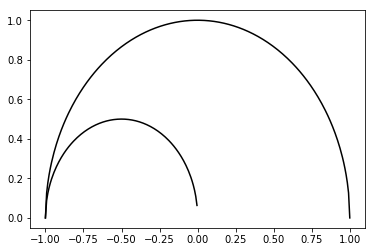

In [88]:
plt.plot(xx, np.sqrt(1 - xx ** 2), c='k')
plt.plot(xx[:200], np.sqrt(1 - ((xx[:200] + 0.5) * 2) ** 2) / 2, c='k');

In [143]:
x = np.linspace(-1.2, 1.2, 30)
y = np.linspace(-1.2, 1.2, 30)
x, y = np.meshgrid(x, y)

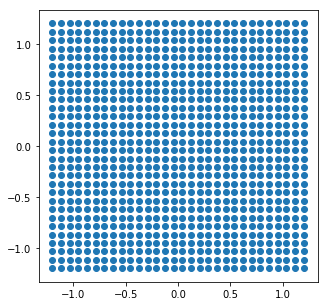

In [145]:
figsize(5, 5)
plt.scatter(x, y);

In [146]:
X = np.vstack((x, y)).T

In [147]:
import SpatialDE

In [150]:
K = SpatialDE.base.SE_kernel(X, 0.1)
I = np.eye(K.shape[0])

In [151]:
Y = np.random.multivariate_normal(0 * X[:, 0] + 2.5, 2. * (0.95 * K + 0.05 * I))

In [152]:
mask = y > np.sqrt(1 - ((x + 0.5) * 2) ** 2) / 2
mask ^= y > -np.sqrt(1 - ((x - 0.5) * 2) ** 2) / 2
mask &= y < np.sqrt(1 - x ** 2)

/Users/vale/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.
/Users/vale/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.
/Users/vale/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  
/Users/vale/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  
/Users/vale/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/vale/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in less
  This is separate from the ipykernel package so we can avoid 

In [159]:
X

array([[-1.2       , -1.2       , -1.2       , ...,  1.03448276,
         1.11724138,  1.2       ],
       [-1.11724138, -1.11724138, -1.11724138, ...,  1.03448276,
         1.11724138,  1.2       ],
       [-1.03448276, -1.03448276, -1.03448276, ...,  1.03448276,
         1.11724138,  1.2       ],
       ..., 
       [ 1.03448276,  1.03448276,  1.03448276, ...,  1.03448276,
         1.11724138,  1.2       ],
       [ 1.11724138,  1.11724138,  1.11724138, ...,  1.03448276,
         1.11724138,  1.2       ],
       [ 1.2       ,  1.2       ,  1.2       , ...,  1.03448276,
         1.11724138,  1.2       ]])

In [158]:
plt.scatter(*X);

TypeError: scatter() takes from 2 to 15 positional arguments but 30 were given

In [156]:
X

array([[-1.2       , -1.2       , -1.2       , ...,  1.03448276,
         1.11724138,  1.2       ],
       [-1.11724138, -1.11724138, -1.11724138, ...,  1.03448276,
         1.11724138,  1.2       ],
       [-1.03448276, -1.03448276, -1.03448276, ...,  1.03448276,
         1.11724138,  1.2       ],
       ..., 
       [ 1.03448276,  1.03448276,  1.03448276, ...,  1.03448276,
         1.11724138,  1.2       ],
       [ 1.11724138,  1.11724138,  1.11724138, ...,  1.03448276,
         1.11724138,  1.2       ],
       [ 1.2       ,  1.2       ,  1.2       , ...,  1.03448276,
         1.11724138,  1.2       ]])

In [139]:
from mpl_toolkits.mplot3d import Axes3D

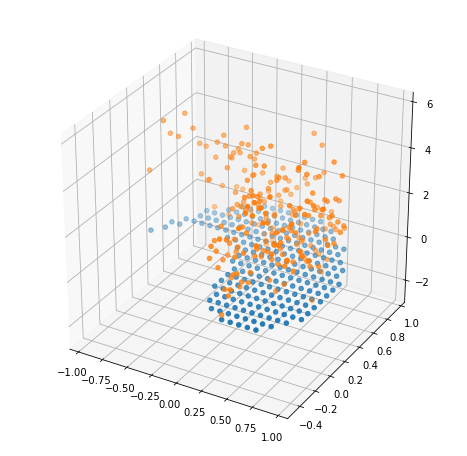

In [140]:
figsize(8, 8)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(*X.T);
ax.scatter(*X.T, Y);

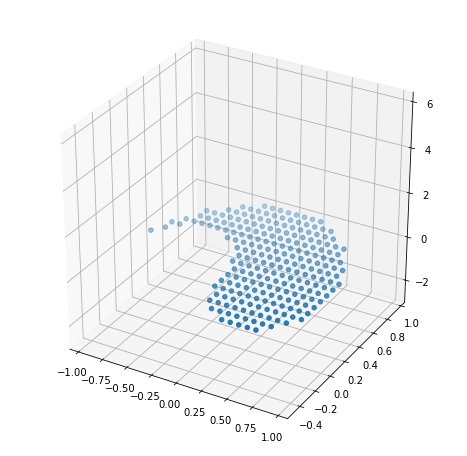

In [142]:
figsize(8, 8)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(*X.T);
ax.plot_surface(*X.T, Y);

In [3]:
import SpatialDE as sde

In [455]:
from seaborn import desaturate

In [458]:
plt.style.use('default')

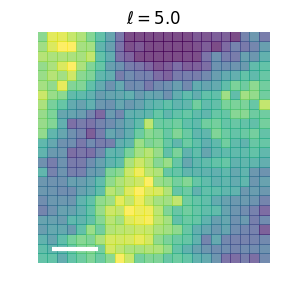

In [955]:
figsize(3, 3)

xmin=5
xmax=30
ymin=5
ymax=30

x = np.linspace(xmin, xmax, 25)
y = np.linspace(ymin, ymax, 25)

X1, X2 = np.meshgrid(x, y)
X = np.vstack((X1.flatten(), X2.flatten())).T

i = 0
ls = 5.
K = sde.base.SE_kernel(X, ls)
I = np.eye(K.shape[0])
Y = np.random.multivariate_normal(0 * X[:, 0] + 2.5, 2. * (0.95 * K + 0.05 * I))

# plt.subplot(1, len(ls_list), i + 1)
plt.pcolormesh(X1, X2, Y.reshape(X1.shape), alpha=0.7, vmin=0, vmax=5)
# plt.contour(X1, X2, Y.reshape(X1.shape))
plt.axis('equal')
plt.title('$ \ell = {} $'.format(ls));
plt.axis('off');

plt.hlines(6.5, 6.5, 11.5, color='w', lw=3);
# plt.annotate('5 units', (6.5, 7.), color='w', size=9)
plt.savefig(f'example_se_{ls}.pdf')

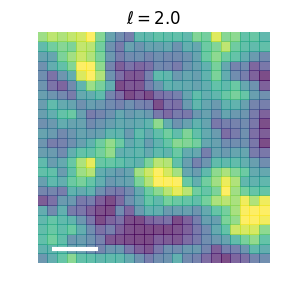

In [962]:
figsize(3, 3)

xmin=5
xmax=30
ymin=5
ymax=30

x = np.linspace(xmin, xmax, 25)
y = np.linspace(ymin, ymax, 25)

X1, X2 = np.meshgrid(x, y)
X = np.vstack((X1.flatten(), X2.flatten())).T

i = 0
ls = 2.
K = sde.base.SE_kernel(X, ls)
I = np.eye(K.shape[0])
Y = np.random.multivariate_normal(0 * X[:, 0] + 2.5, 2. * (0.95 * K + 0.05 * I))

# plt.subplot(1, len(ls_list), i + 1)
plt.pcolormesh(X1, X2, Y.reshape(X1.shape), alpha=0.7, vmin=0, vmax=5)
# plt.contour(X1, X2, Y.reshape(X1.shape))
plt.axis('equal')
plt.title('$ \ell = {} $'.format(ls));
plt.axis('off');

plt.hlines(6.5, 6.5, 11.5, color='w', lw=3);
# plt.annotate('5 units', (6.5, 7.), color='w', size=9)
plt.savefig(f'example_se_{ls}.pdf')

In [963]:
!ls

Example Spatial Patterns.ipynb example_se_5.0.pdf
P-value estimation.ipynb       example_se_{ls}.pdf
example_se_2.0.pdf


/Users/vale/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:18: RuntimeWarning: covariance is not positive-semidefinite.


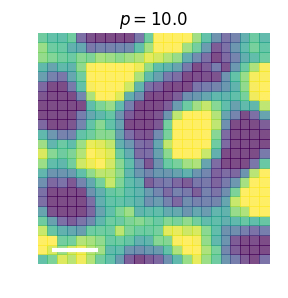

In [964]:
figsize(3, 3)

xmin=5
xmax=30
ymin=5
ymax=30

x = np.linspace(xmin, xmax, 25)
y = np.linspace(ymin, ymax, 25)

X1, X2 = np.meshgrid(x, y)
X = np.vstack((X1.flatten(), X2.flatten())).T

i = 0
p = 10.
K = sde.base.cosine_kernel(X, p)
I = np.eye(K.shape[0])
Y = np.random.multivariate_normal(0 * X[:, 0] + 2.5, 2. * (0.95 * K + 0.05 * I))

# plt.subplot(1, len(ls_list), i + 1)
plt.pcolormesh(X1, X2, Y.reshape(X1.shape), alpha=0.7, vmin=0, vmax=5)
# plt.contour(X1, X2, Y.reshape(X1.shape))
plt.axis('equal')
plt.title('$ p = {} $'.format(p));
plt.axis('off');

plt.hlines(6.5, 6.5, 11.5, color='w', lw=3);
plt.savefig(f'example_per_{p}.pdf')

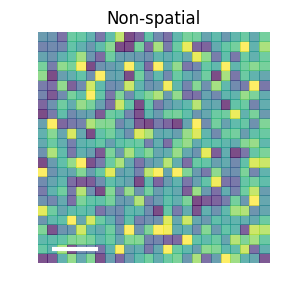

In [969]:
figsize(3, 3)

xmin=5
xmax=30
ymin=5
ymax=30

x = np.linspace(xmin, xmax, 25)
y = np.linspace(ymin, ymax, 25)

X1, X2 = np.meshgrid(x, y)
X = np.vstack((X1.flatten(), X2.flatten())).T

i = 0
ls = 2.
K = sde.base.SE_kernel(X, ls)
I = np.eye(K.shape[0])
Y = np.random.multivariate_normal(0 * X[:, 0] + 2.5, 2. * (0.0 * K + 1.0 * I))

# plt.subplot(1, len(ls_list), i + 1)
plt.pcolormesh(X1, X2, Y.reshape(X1.shape), alpha=0.7, vmin=0, vmax=5)
# plt.contour(X1, X2, Y.reshape(X1.shape))
plt.axis('equal')
plt.title('Non-spatial');
plt.axis('off');

plt.hlines(6.5, 6.5, 11.5, color='w', lw=3);
# plt.annotate('5 units', (6.5, 7.), color='w', size=9)
plt.savefig(f'example_null.pdf')

In [473]:
cm.viridis(Y).app

array([[ 0.993248,  0.906157,  0.143936,  1.      ],
       [ 0.993248,  0.906157,  0.143936,  1.      ],
       [ 0.993248,  0.906157,  0.143936,  1.      ],
       ..., 
       [ 0.993248,  0.906157,  0.143936,  1.      ],
       [ 0.993248,  0.906157,  0.143936,  1.      ],
       [ 0.993248,  0.906157,  0.143936,  1.      ]])

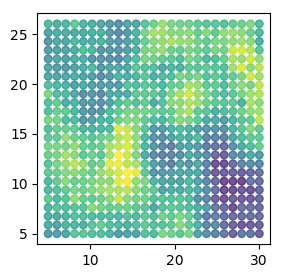

In [531]:
norm = mpl.colors.Normalize(vmin=0,vmax=5)
C = np.apply_along_axis(lambda x: desaturate(x, 1), 1, cm.viridis(norm(Y)))
plt.scatter(X[:, 0], X[:, 1], c=C, s=30, marker='o', alpha=0.75);

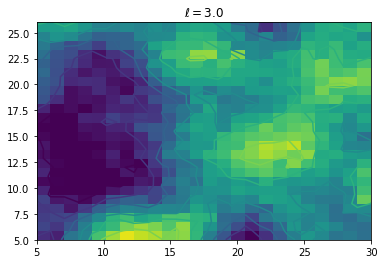

In [378]:
xmin=5
xmax=30
ymin=5
ymax=26

x = np.linspace(xmin, xmax, 25)
y = np.linspace(ymin, ymax, 25)

X1, X2 = np.meshgrid(x, y)
X = np.vstack((X1.flatten(), X2.flatten())).T

i = 0
ls = 3.
K = sde.base.SE_kernel(X, ls)
I = np.eye(K.shape[0])
Y = np.random.multivariate_normal(0 * X[:, 0] + 2.5, 0.95 * K + 0.05 * I)

# plt.subplot(1, len(ls_list), i + 1)
plt.pcolormesh(X1, X2, Y.reshape(X1.shape), vmin=0, vmax=5)
plt.contour(X1, X2, Y.reshape(X1.shape), vmin=0, vmax=5)
# plt.axis('equal')
plt.title('$ \ell = {} $'.format(ls));

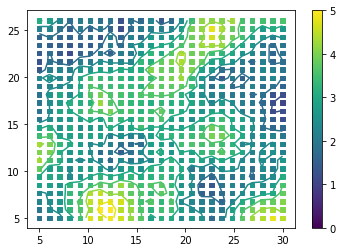

In [354]:
plt.scatter(X[:, 0], X[:, 1], c=Y, s=20, marker='s', vmin=0, vmax=5)
plt.colorbar();
plt.contour(X1, X2, np.abs(Y.reshape(X1.shape)), vmin=0, vmax=5);

In [428]:
25 ** 2

625

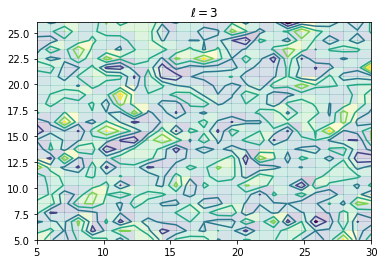

In [433]:
ls_list=[3, 10, 30, 100]
xmin=5
xmax=30
ymin=5
ymax=26

x = np.linspace(xmin, xmax, 25)
y = np.linspace(ymin, ymax, 25)

X1, X2 = np.meshgrid(x, y)
X = np.vstack((X1.flatten(), X2.flatten())).T

i = 0
ls = ls_list[0]
K = sde.base.SE_kernel(X, ls)
I = np.eye(K.shape[0])
Y = np.random.multivariate_normal(0 * X[:, 0] + 2.5, I)

# plt.subplot(1, len(ls_list), i + 1)
plt.pcolormesh(X1, X2, Y.reshape(X1.shape), vmin=0, vmax=5, alpha=0.2)
plt.contour(X1, X2, Y.reshape(X1.shape), vmin=0, vmax=5)
# plt.axis('equal')
plt.title('$ \ell = {} $'.format(ls));

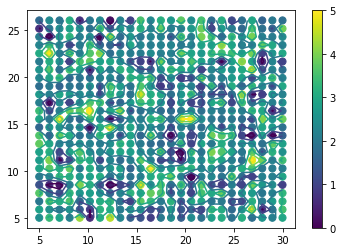

In [380]:
plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, vmin=0, vmax=5)
plt.colorbar();
plt.contour(X1, X2, np.abs(Y.reshape(X1.shape)));